In [44]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
customer_acq=pd.read_csv('D:\\Learning\\Python Foundation Case Study 2 - Credit Card Case Study\\Case Study 2 - Credit Card Case Study\\Customer Acqusition.csv')

### Q1.a.

In [3]:
mean_age=round(customer_acq.Age.mean(),0)

In [4]:
customer_acq.loc[(customer_acq.Age<18), 'Age']=mean_age

### Q1.b.

In [5]:
spend=pd.read_csv("D:\\Learning\\Python Foundation Case Study 2 - Credit Card Case Study\\Case Study 2 - Credit Card Case Study\\spend.csv")

In [6]:
customer_acq_new=pd.merge(customer_acq,spend, how='inner',on='Customer')

In [7]:
customer_acq_new.loc[(customer_acq_new['Amount']> customer_acq_new['Limit']),'Amount']=customer_acq_new.Limit/2

In [8]:
customer_acq_new

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00


### Q1.c.

In [9]:
repayment=pd.read_csv("D:\\Learning\\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\\Repayment.csv")

In [10]:
customer_acq_new=pd.merge(customer_acq_new,repayment,how='outer',on='Customer')

In [11]:
customer_acq_new.rename(columns={'Amount_x':'Expense', 'Amount_y':'Repayment','Month_x':'tran_date','Month_y':'repay_date'},inplace=True)

In [12]:
customer_acq_new.drop(columns=['Unnamed: 4','Sl No:','SL No:'],inplace=True)

In [13]:
customer_acq_new.loc[(customer_acq_new['Repayment']>customer_acq_new['Limit']),'Repayment']=customer_acq_new.Limit

### Q2.a.

In [14]:
customer_acq_new.dropna(axis=0,inplace=True)

In [15]:
len(customer_acq_new.Customer.unique())

100

### Q2.b.

In [16]:
categorical_columns=[x for x in customer_acq_new.dtypes.index if customer_acq_new.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns if x not in ['Customer','tran_date','repay_date']]

In [17]:
categorical_columns

['City', 'Product', 'Company', 'Segment', 'Type']

### Q2.c.

In [18]:
customer_acq_new.tran_date=pd.to_datetime(customer_acq_new.tran_date)

In [19]:
customer_acq_new.repay_date=pd.to_datetime(customer_acq_new.repay_date)

In [20]:
customer_acq_new['tran_month']=customer_acq_new.tran_date.dt.month
customer_acq_new['tran_year']=customer_acq_new.tran_date.dt.year


In [21]:
average_monthly_spend=customer_acq_new.groupby(['tran_month','tran_year'])['Expense'].mean()

In [22]:
average_monthly_spend

tran_month  tran_year
1           2004         152182.008163
            2005         208812.640014
            2006         127310.667486
2           2004         144740.708735
            2005         163679.550911
            2006         151344.710358
3           2004         144182.827213
            2006         138188.776439
4           2004         127635.273329
            2005         155184.241114
            2006         137026.322013
5           2004         165468.052833
            2005         163493.608106
            2006         155213.218469
6           2005         191079.325826
            2006         166654.512157
7           2005         116206.227870
            2006         202442.227133
8           2005         149196.577121
            2006         212606.492824
9           2004         178778.153984
            2005         119407.348540
            2006         159827.763613
10          2005          91316.944807
            2006         188358.225840
11 

### Q2.d.

In [23]:
average_monthly_repay=customer_acq_new.groupby(['tran_month','tran_year'])['Repayment'].mean()
average_monthly_repay

tran_month  tran_year
1           2004         164823.689177
            2005         159750.479199
            2006         146904.045829
2           2004         175062.215838
            2005         191949.503482
            2006         149905.888916
3           2004         154973.865765
            2006         158397.090523
4           2004         153304.113597
            2005         166507.538653
            2006         157035.574858
5           2004         205776.925779
            2005         178141.400509
            2006         164902.554898
6           2005         183099.011076
            2006         180765.645658
7           2005         146331.038145
            2006         184879.757480
8           2005         160858.763688
            2006         231858.340967
9           2004         172814.866786
            2005         144802.187019
            2006         214370.356183
10          2005         137592.230386
            2006         216135.704133
11 

### Q2.e.

In [24]:
monthly_expense=customer_acq_new.groupby(['tran_month','tran_year'])['Expense'].sum()
monthly_repayment=customer_acq_new.groupby(['tran_month','tran_year'])['Repayment'].sum()
monthly_profit=monthly_expense-monthly_repayment
Interest_earned=monthly_profit.apply(lambda x : max(x,0) *0.029)
round(Interest_earned,2)


tran_month  tran_year
1           2004               0.00
            2005         1030109.13
            2006               0.00
2           2004               0.00
            2005               0.00
            2006           40807.85
3           2004               0.00
            2006               0.00
4           2004               0.00
            2005               0.00
            2006               0.00
5           2004               0.00
            2005               0.00
            2006               0.00
6           2005          281649.25
            2006               0.00
7           2005               0.00
            2006          381983.71
8           2005               0.00
            2006               0.00
9           2004           62948.46
            2005               0.00
            2006               0.00
10          2005               0.00
            2006               0.00
11          2004               0.00
            2005          352143.98
      

### Q2.f.

In [25]:
customer_acq_new['Type'].value_counts().sort_values(ascending=False).head(5)

PETRO           4829
CAMERA          4237
FOOD            4056
AIR TICKET      3537
TRAIN TICKET    3387
Name: Type, dtype: int64

### Q2.g.

In [26]:
customer_acq_new.groupby('City')['Expense'].sum().sort_values(ascending=False).head(1)

City
COCHIN    1.175903e+09
Name: Expense, dtype: float64

### Q2.h.

In [27]:
customer_acq_new.groupby('Age')['Expense'].sum().sort_values(ascending=False).head(1)

Age
28.0    6.154699e+08
Name: Expense, dtype: float64

### Q2.i.

In [28]:
customer_acq_new.groupby('Customer')['Repayment'].sum().sort_values(ascending=False).head(10)

Customer
A61    4.004874e+08
A60    3.752990e+08
A13    2.967320e+08
A43    2.631860e+08
A45    2.618984e+08
A12    2.583776e+08
A14    2.462413e+08
A44    2.400866e+08
A39    2.362970e+08
A42    2.360793e+08
Name: Repayment, dtype: float64

### Q3.

In [116]:
grouped = customer_acq_new.groupby(['City', 'Product', 'tran_year']).sum().reset_index()
pivot_table = grouped.pivot_table(index=['City', 'tran_year'], columns='Product', values='Expense').reset_index()
pivot_table['City_Year'] = pivot_table['City'] + ' - ' + pivot_table['tran_year'].astype(str)

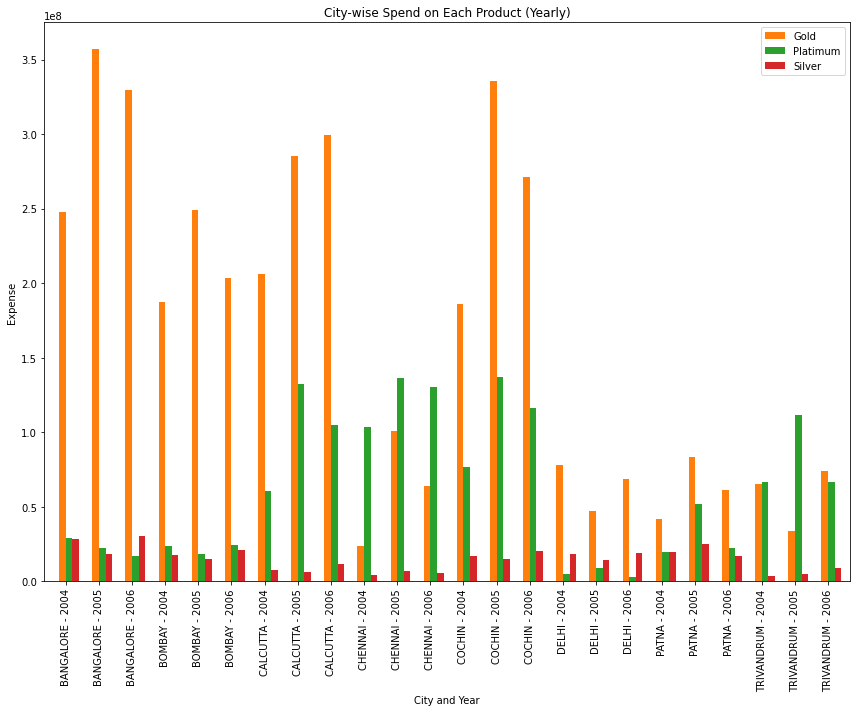

In [172]:
ax=pivot_table.plot(x='City_Year',kind='bar',figsize=(12,10),width=0.8)
ax.set_xlabel('City and Year')
ax.set_ylabel('Expense')
ax.set_title('City-wise Spend on Each Product (Yearly)')
handles, labels = ax.get_legend_handles_labels()
# Remove the first element from handles and labels (tran_year)
handles = handles[1:]
labels = labels[1:]
# Set the modified legend
ax.legend(handles, labels)
plt.tight_layout()
plt.show()


### Q4.a.

In [118]:
group2=customer_acq_new.groupby(['City','tran_month','tran_year']).sum().reset_index()

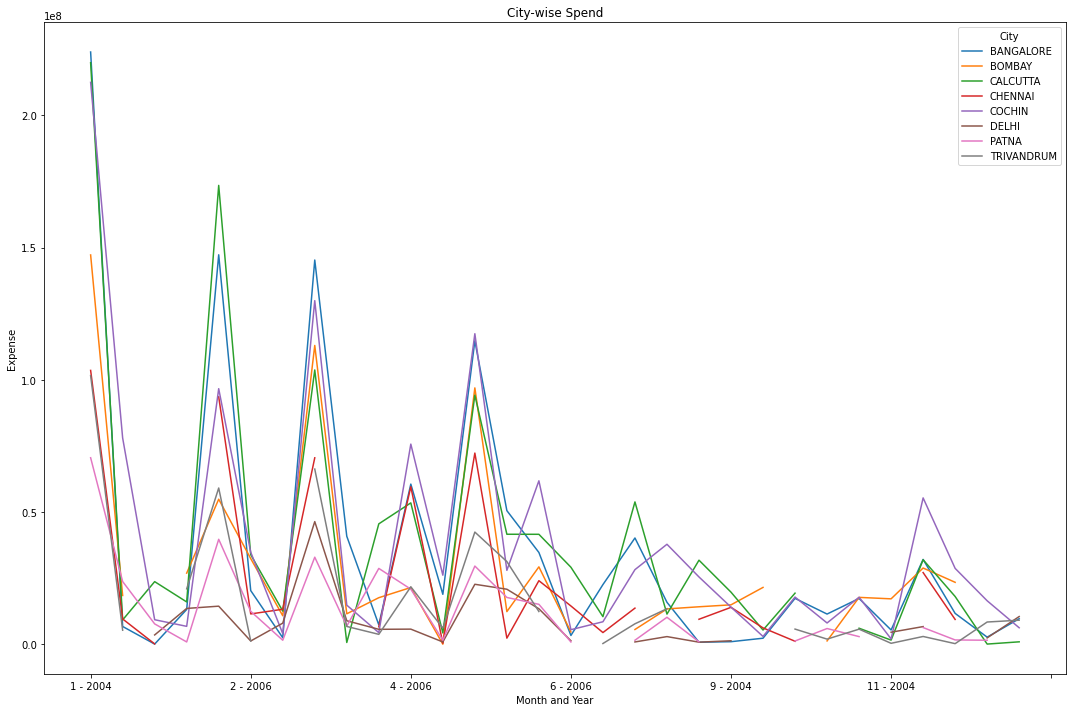

In [171]:
pivot_table2=group2.pivot_table(index=['tran_month','tran_year'],columns='City',values='Expense').reset_index()
pivot_table2['Month_Year'] = pivot_table2['tran_month'].astype(str) + ' - ' + pivot_table2['tran_year'].astype(str)
pivot_table2.drop(columns=['tran_month','tran_year'],inplace=True)
ax2=pivot_table2.plot(x='Month_Year',kind='line',figsize=(15,10))
ax2.set_xlabel('Month and Year')
ax2.set_ylabel('Expense')
ax2.set_title('City-wise Spend')
plt.tight_layout()
plt.show()

### Q4.b.

In [158]:
air_spend=customer_acq_new[customer_acq_new.Type=='AIR TICKET']

In [160]:
air_spend=air_spend.groupby('tran_year').sum().reset_index()

In [164]:
air_spend.drop(columns=['No','Age','Limit','Repayment'],inplace=True)

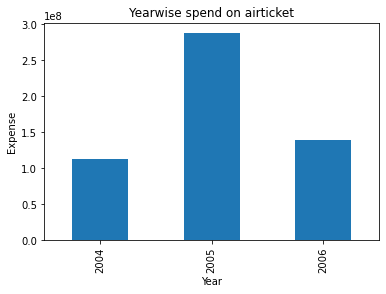

In [175]:
ax3=air_spend.plot(x='tran_year',kind='bar',legend=False)
ax3.set_xlabel('Year')
ax3.set_ylabel('Expense')
ax3.set_title('Yearwise spend on airticket')
plt.show()

### Q4.c.

In [198]:
monthly_spend=customer_acq_new.groupby(['Product','tran_year','tran_month']).sum().reset_index()

In [199]:
monthly_spend['Month_year']=monthly_spend['tran_month'].astype(str) + ' - ' + monthly_spend['tran_year'].astype(str)
monthly_spend.drop(columns=['tran_month','tran_year','No','Age','Limit','Repayment'],inplace=True)

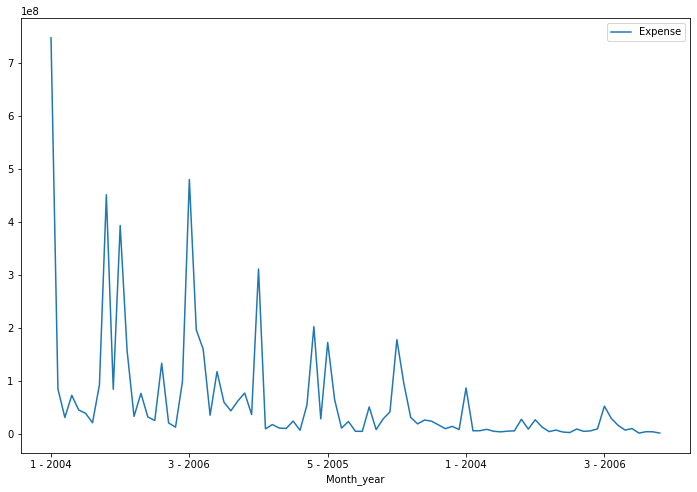

In [213]:
ax4=monthly_spend.plot(x='Month_year',y='Expense',kind='line',figsize=(12,8))

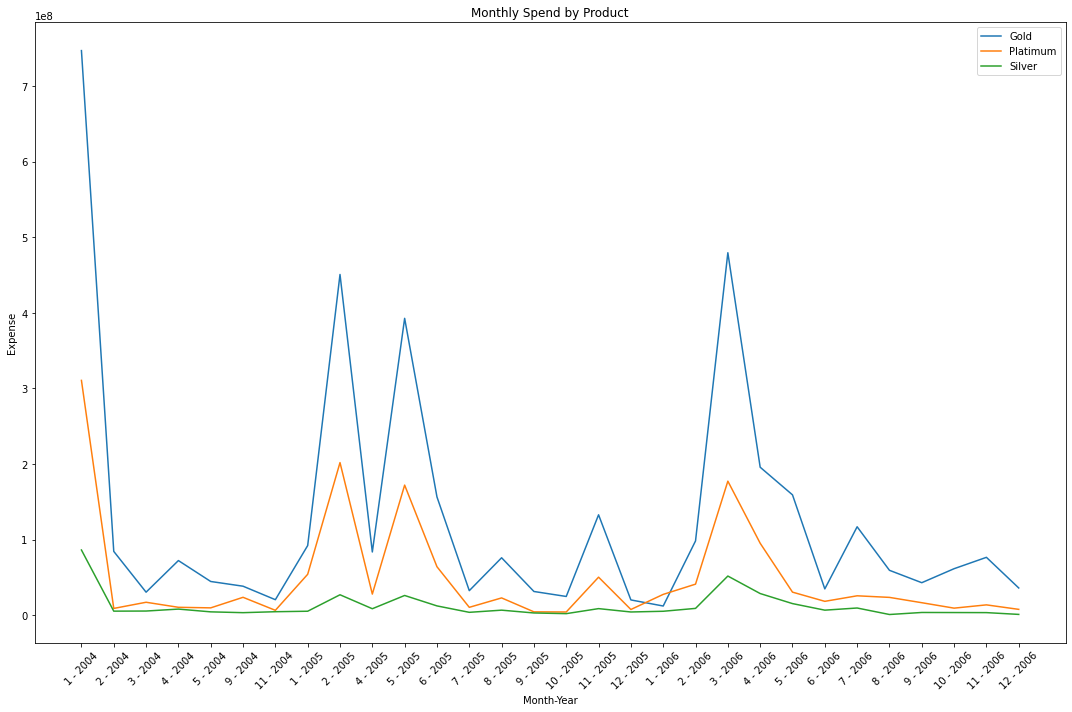

The end of the year shows downfall in expenditure


In [225]:
plt.figure(figsize=(15,10))
for product in monthly_spend['Product'].unique():
    product_data = monthly_spend[monthly_spend['Product'] == product]
    plt.plot(product_data['Month_year'], product_data['Expense'], label=product)
plt.xlabel('Month-Year')
plt.ylabel('Expense')
plt.title('Monthly Spend by Product')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('The end of the year shows downfall in expenditure')

### Q5.

In [432]:
customer_acq_new['repay_month']=customer_acq_new.repay_date.dt.month
customer_acq_new['repay_year']=customer_acq_new.repay_date.dt.year
repayment_data=customer_acq_new.groupby(['City','Customer','Product','repay_month','repay_year']).sum().reset_index()
repayment_data.drop(columns=['No','Age','Limit','Expense','tran_month','tran_year'],inplace=True)
def top_ten_customers(product, time_period):   
        if time_period == "Yearly":
            for c in repayment_data['City'].unique():
                product_data2 = repayment_data[repayment_data['City'] == c]
                product_table=product_data2.pivot_table(index=['City','Customer','Product','repay_month','repay_year'],values='Repayment',aggfunc='sum').reset_index()
                product_table.drop(columns=['repay_month'],inplace=True)
                r=product_table[product_table.Product == product].sort_values(by='Repayment',ascending=False).head(10).reset_index()
                print(r)
        else:
            for c in repayment_data['City'].unique():
                product_data2 = repayment_data[repayment_data['City'] == c]
                product_table=product_data2.pivot_table(index=['City','Customer','Product','repay_month','repay_year'],values='Repayment',aggfunc='sum').reset_index()
                product_table.drop(columns=['repay_year'],inplace=True)
                r=product_table[product_table.Product == product].sort_values(by='Repayment',ascending=False).head(10).reset_index()
                print(r)

    

#Calling function
top_ten_customers("Silver", 'Yearly')
# top_ten_customers("Gold", "Monthly")
# top_ten_customers("Silver", "Yearly")

   index       City Customer Product  repay_year    Repayment
0     62  BANGALORE      A23  Silver        2004  12416871.24
1     43  BANGALORE      A18  Silver        2006  12000000.00
2    136  BANGALORE      A59  Silver        2004   9054478.50
3     69  BANGALORE      A23  Silver        2006   8100081.00
4     67  BANGALORE      A23  Silver        2006   8100081.00
5     63  BANGALORE      A23  Silver        2005   8100081.00
6     41  BANGALORE      A18  Silver        2004   7831854.20
7    139  BANGALORE      A59  Silver        2006   5700171.00
8     74  BANGALORE      A23  Silver        2005   5400054.00
9     68  BANGALORE      A23  Silver        2005   5400054.00
   index    City Customer Product  repay_year    Repayment
0     26  BOMBAY      A22  Silver        2004  23100000.00
1     34  BOMBAY      A22  Silver        2006   9640650.36
2     32  BOMBAY      A22  Silver        2006   8353320.03
3     37  BOMBAY      A22  Silver        2006   6600000.00
4     36  BOMBAY      A